<a href="https://colab.research.google.com/github/cosmotim/Colab/blob/master/Loading_and_Viewing_MRI_Data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Reading and viewing MRI Data Slices

First, information about the OASIS 1 Dataset can be found by clicking the "OASIS 1" button under "OASIS Brains Datasets" at https://www.oasis-brains.org/. See also the fact sheet here: https://www.oasis-brains.org/files/oasis_cross-sectional_facts.pdf.

We will start by loading a single file into Python using numpy and matplotlib. Numpy is going to be our standard matrix/array processing library while matplotlib will be our standard graphing library. We will import matplotlib in two forms, one to make its graphing functionality convenient `plt` and one to access all of its other functions as needed `matplotlib`. 

The code below imports these libraries, and then uses `matplotlib` to import a single MRI slice. The pictures are stored as .png files, which have a huge amount of redundancy since the pictures are black and white while the images are RGB. Practically, this means that each image is imported as $176\times 208\times 3$ array, where each of the $176\times 208$ pixels has a Red Green and Blue value. 

Since for each pixel the RG and B values are the same, to get the array of intensities we just average across the RGB portion of the array, that is we take the mean along the third axis. Since Python always starts indexing at 0, this means we us `np.mean(data, axis = 2)` to take the mean along the third axis. 

### Content in Colab
To upload the date file into a place where they are accessable to Google Colab, you need to give Google permission to access your Google Drive. 

The code below will mount your google drive in a virtual directory accessable to your Colab Notebook. Run the code, follow the link, and grant google permission to access your drive. 

__In Google Drive__ create a new folder call "OASIS 1 Images", or whatever you would like to call it. Upload the __unziped__ images and labels file into the "OASIS 1 Images" folder you just created. 

In [0]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


__In Google Drive__ create a new folder call "OASIS 1 Images", or whatever you would like to call it. Upload the __unziped__ images and labels file into the "OASIS 1 Images" folder you just created. 

In the dock to the left, navigate the to the __Files__ section. You will see your google drive mounted under "drive/My Drive/". Use the file navigator to figure out the path to your images folder. If you named your folder "OASIS 1 Images" as above, the path to your images should be

`'/content/drive/My Drive/OASIS 1 Images/'`

Image Shape:  (176, 208, 4)
Data Shape:  (176, 208)


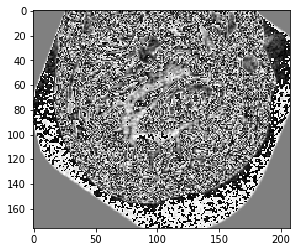

In [0]:
import numpy as np
from matplotlib import pyplot as plt
import matplotlib

file_path = '/content/drive/My Drive/OASIS 1 Images/OAS1_0001_MR1_mpr_n4_anon_111_t88_gfc_44.png'

img = matplotlib.image.imread(file_path)
print("Image Shape: ", img.shape)

data = np.mean(img, axis=2)                   # Take mean along third axis
plt.imshow(data,cmap='gist_gray_r')           # Display image

print("Data Shape: ", data.shape)

Try loading and looking at some of the other files. 

## Read the Labels File

We will read in the labels file with Pandas. Pandas is Pythons dataframe library. A dataframe is like a spreadsheet, complete with column header, row numbers, and host of utility functions. For example, after you load on the labels file below, try the following line of code to generate histograms of each of the columns:

`labels.hist()`

In [0]:
import pandas as pd

labels = pd.read_csv('/content/drive/My Drive/OASIS 1 Images/labels.csv')
labels

,Unnamed: 0,ID,M/F,Hand,Age,Educ,SES,MMSE,CDR,eTIV,nWBV,ASF,Delay,Filename
0,0,OAS1_0001_MR1,F,R,74,2.0,3.0,29.0,0.0,1344,0.743,1.306,NaN,OAS1_0001_MR1_mpr_n4_anon_111_t88_gfc_44.png
1,1,OAS1_0001_MR1,F,R,74,2.0,3.0,29.0,0.0,1344,0.743,1.306,NaN,OAS1_0001_MR1_mpr_n4_anon_111_t88_gfc_86.png
2,2,OAS1_0001_MR1,F,R,74,2.0,3.0,29.0,0.0,1344,0.743,1.306,NaN,OAS1_0001_MR1_mpr_n4_anon_111_t88_gfc_128.png
3,3,OAS1_0002_MR1,F,R,55,4.0,1.0,29.0,0.0,1147,0.810,1.531,NaN,OAS1_0002_MR1_mpr_n4_anon_111_t88_gfc_44.png
4,4,OAS1_0002_MR1,F,R,55,4.0,1.0,29.0,0.0,1147,0.810,1.531,NaN,OAS1_0002_MR1_mpr_n4_anon_111_t88_gfc_86.png
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
697,697,OAS1_0456_MR1,M,R,61,5.0,2.0,30.0,0.0,1637,0.780,1.072,NaN,OAS1_0456_MR1_mpr_n4_anon_111_t88_gfc_86.png
698,698,OAS1_0456_MR1,M,R,61,5.0,2.0,30.0,0.0,1637,0.780,1.072,NaN,OAS1_0456_MR1_mpr_n4_anon_111_t88_gfc_128.png
699,699,OAS1_0457_MR1,F,R,62,3.0,3.0,26.0,0.0,1372,0.766,1.279,NaN,OAS1_0457_MR1_mpr_n3_anon_111_t88_gfc_44.png
700,700,OAS1_0457_MR1,F,R,62,3.0,3.0,26.0,0.0,1372,0.766,1.279,NaN,OAS1_0457_MR1_mpr_n3_anon_111_t88_gfc_86.png


## Load All Files

To load all of the files into an array we need to be able to search through the directory. Luckily, this is easy to do using the labels file, since each file name is stored there. We just need to loop through the __Filename__ column in the `labels` dataset and load them into an array one by one. There are 702 files in total. 

With the array there are two ways we can load them in: First, we can load them into a $702\times 176 \times 208$ array, which is the best option if we care about the 2D structure. However for algorithms like linear regression that done see the 2D structure, we may want to flatten the images to a $702\times 36608$ array (note that $36608 = 176 \times 208$). Its easy enough two switch back and forth between the two array structures later. We will start with the flattened array. 



In [0]:
file_dir = '/content/drive/My Drive/OASIS 1 Images/'

data = np.zeros([702, 36608])

for i, file_name in enumerate(labels.Filename):
    data[i,:] = np.mean(matplotlib.image.imread(file_dir + file_name),axis=2).reshape(-1)

We can look through the files one by one if we want, and display them by reshaping them back to their original dimensions:

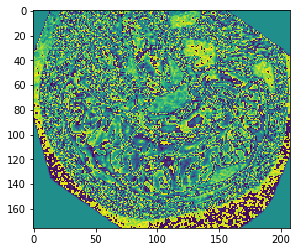

In [0]:
plt.imshow(data[1,:].reshape(176,208))

In [0]:
36608/256

143.0

## Challenge: 

Find an example of a brain with stage 2 dementia and compare it to a brain with stage 0 dementia. 